In [1]:
#https://www.kaggle.com/jacobbaruch/nba-player-of-the-week

import pandas as pd
import numpy as np
import csv 


# split first middle last
#split team neame
#split date 
#remove column

In [2]:
bbfile = '/Users/kenmckee/Desktop/GS/F18/Scrpt/KMCKEE_HW1/NBA_player_of_the_week.csv'

In [3]:
#You may choose a dataset to work with.  
#As a guideline, datasets should be chosen that have somewhere between 500 and 4,000 lines of data 
#with some number of columns between 4 and 50.  
#These guidelines are not exact limits, just guidance for selecting data.


bbdf = pd.read_csv(bbfile)

#print(bbdf)
bbdf.shape

(1145, 13)

In [4]:
bbdf.Player.unique()


array(['Micheal Ray Richardson', 'Derek Smith', 'Calvin Natt',
       'Kareem Abdul-Jabbar', 'Larry Bird', 'Darrell Griffith',
       'Sleepy Floyd', 'Mark Aguirre', 'Magic Johnson',
       'Dominique Wilkins', 'Tom McMillen', 'Michael Jordan',
       'World B. Free', 'Isiah Thomas', 'Terry Cummings',
       'Orlando Woolridge', 'Jack Sikma', 'Bernard King', 'Moses Malone',
       'Alex English', 'Larry Nance', 'Herb Williams', 'Charles Barkley',
       'Adrian Dantley', 'Sidney Moncrief', 'Clyde Drexler',
       'Alvin Robertson', 'Jeff Ruland', 'Patrick Ewing', 'Buck Williams',
       'Julius Erving', 'Larry Smith', 'Karl Malone', 'Fat Lever',
       'Otis Thorpe', 'Tom Chambers', 'Hot Rod Williams', 'Robert Parish',
       'Harold Pressley', 'Bobby Hansen', 'Roy Tarpley', 'John Stockton',
       'Byron Scott', 'Xavier McDaniel', 'Kevin Johnson', 'Chuck Person',
       'Hakeem Olajuwon', 'Ron Harper', 'Chris Mullin', 'Dale Ellis',
       'Michael Adams', 'David Robinson', 'Rony Seika

In [5]:
pu = bbdf.Player.unique()
print(len(pu))

print(1145/274)

274
4.178832116788321


In [6]:
bbdf.Conference.unique()

bbdf.isnull().sum()



Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
dtype: int64

In [7]:
bbdf['Last-Name'] = bbdf['Player'].str.rsplit(' ',1).str[1]
bbdf['First-Name'] = bbdf['Player'].str.rsplit(' ',1).str[0]

print(bbdf)

      Age Conference          Date  Draft Year Height                  Player  \
0      29        NaN  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23        NaN   Apr 7, 1985        1982    6-6             Derek Smith   
2      28        NaN   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37        NaN  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28        NaN  Mar 17, 1985        1978    6-9              Larry Bird   
5      26        NaN  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24        NaN   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25        NaN  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25        NaN  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25        NaN   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32        NaN  Jan 27, 1985        1974   6-11            Tom McMillen   
11     22        NaN  Jan 20

In [8]:
#s.rsplit(";", 3)

bbdf['TeamName'] = bbdf['Team'].str.rsplit(' ',1).str[1]
bbdf['City'] = bbdf['Team'].str.rsplit(' ',1).str[0]
bbdf = bbdf.drop(['Season'],axis=1)
bbdf['RSeason'] = bbdf['Season short']
bbdf = bbdf.drop(['Season short'],axis=1)


In [9]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

#print(bbdfnt)

#for t in bbdfnt:
#    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
#    print(t,c)
    


In [10]:
print(bbdfn.loc[[379]])

     Age Conference          Date  Draft Year Height       Player Position  \
379   21        NaN  Nov 26, 2000        1999    6-3  Baron Davis        G   

     Seasons in league               Team Weight  Real_value Last-Name  \
379                  1  Charlotte Hornets    215         1.0     Davis   

    First-Name TeamName       City  RSeason  
379      Baron  Hornets  Charlotte     2001  


In [11]:
WEST = ('Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','Supersonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves',)
EAST = ('Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets')

In [12]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets','Pistons']),'East', bbdf['Conference'])
#print(bbdf)


In [13]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','SuperSonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves']),'West', bbdf['Conference'])
#print(bbdf)

In [14]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

print(bbdfnt)

for t in bbdfnt:
    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
    print(t,c)

[]


In [15]:
bbdf[['h','htype']] = bbdf['Height'].str.split('cm', expand=True)
#print(bbdf['htype'])


In [16]:
bbdf.h[bbdf['htype'].isnull()] = 0
#print(bbdf['h'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
#bbdf['h'].loc[bbdf['htype'].notnull()]

In [18]:
bbdf.h[bbdf['htype'].notnull()] = (bbdf['h'].astype(float)*0.393701)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
#bbdf['htype'].isna()

In [20]:
bbdf['feet'] = 0
bbdf['inches'] = 0
bbdf.feet[bbdf['htype'].isnull()] , bbdf.inches[bbdf['htype'].isnull()] = bbdf['Height'].str.split('-', 1).str

bbdf.inches[bbdf['htype'].notnull()] = bbdf['h'].astype(int)

#print(bbdf['inches'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

In [21]:
#print(bbdf.feet)

In [22]:
bbdf['inches'] = (bbdf['feet'].astype(int) * 12) + (bbdf['inches'].astype(int))
#print(bbdf['inches'])






#print(bbdf['feet'], bbdf['htype'])
#print(bbdf['feet'])

In [23]:
bbdf['feet'] = bbdf['inches'].astype(float)/12
#df['Values'] = values.where(df.Action == 'Sell', other=-values)
bbdf['feet'] = bbdf.feet.round(1)

In [24]:
bbdf[['weight','wtype']] = bbdf['Weight'].str.split('kg', expand=True)
#print (bbdf)

In [25]:
bbdf.weight[bbdf['wtype'].notnull()] = (bbdf['weight'].astype(float)*2.20462)
bbdf['weight'] = bbdf['weight'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
pocounts = bbdf['Position'].value_counts()
print(pocounts)

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64


In [27]:
d = {'F-C':'FC','G-F':'GF'}
bbdf = bbdf.replace(d)

In [28]:
pocounts = bbdf['Position'].value_counts()
print(pocounts)

G     178
SG    164
C     158
PF    139
F     125
PG    120
SF    119
FC     92
GF     50
Name: Position, dtype: int64


In [29]:
bbdf = bbdf.drop(['Height'],axis=1)
bbdf = bbdf.drop(['Weight'],axis=1)
#bbdf = bbdf.drop(['htype'],axis=1)
#bbdf = bbdf.drop(['wtype'],axis=1)
#bbdf = bbdf.drop(['h'],axis=1)

print(bbdf)

      Age Conference          Date  Draft Year                  Player  \
0      29       East  Apr 14, 1985        1978  Micheal Ray Richardson   
1      23       West   Apr 7, 1985        1982             Derek Smith   
2      28       West   Apr 1, 1985        1979             Calvin Natt   
3      37       West  Mar 24, 1985        1969     Kareem Abdul-Jabbar   
4      28       East  Mar 17, 1985        1978              Larry Bird   
5      26       West  Mar 10, 1985        1980        Darrell Griffith   
6      24       West   Mar 3, 1985        1982            Sleepy Floyd   
7      25       West  Feb 24, 1985        1981            Mark Aguirre   
8      25       West  Feb 17, 1985        1979           Magic Johnson   
9      25       East   Feb 3, 1985        1982       Dominique Wilkins   
10     32       East  Jan 27, 1985        1974            Tom McMillen   
11     22       East  Jan 20, 1985        1984          Michael Jordan   
12     31       East  Jan 13, 1985    

In [30]:
#bbdf['w'].loc[bbdf['wtype'].notnull()]

In [31]:
bbdfu = bbdf.groupby(['Player']).first()

#print(bbdfu)
bbdfug = bbdfu.groupby(['Position'])
#list(bbdfug)

bbdfugd = dict(tuple(bbdfu.groupby('Position')))
print(type(bbdfugd))
print(bbdfugd)

<class 'dict'>
{'C':                      Age Conference          Date  Draft Year Position  \
Player                                                                   
Alonzo Mourning       23       East  Apr 18, 1993        1992        C   
Andre Drummond        22       East   Nov 9, 2015        2012        C   
Andrew Bogut          25       East  Mar 15, 2010        2005        C   
Andrew Bynum          21       West  Jan 26, 2009        2005        C   
Arvydas Sabonis       31       West  Mar 31, 1996        1985        C   
Brad Daugherty        26       East  Nov 17, 1991        1986        C   
Brad Miller           28       West  Jan 30, 2005        1998        C   
Brook Lopez           26       East   Apr 6, 2015        2008        C   
Chris Kaman           27       West  Jan 11, 2010        2003        C   
David Robinson        24       West  Apr 22, 1990        1987        C   
DeMarcus Cousins      23       West  Jan 13, 2014        2010        C   
Dikembe Mutombo  

In [32]:
print("min ", bbdfu['weight'].min())
print("max ", bbdfu['weight'].max())
print("median ",bbdfu['weight'].median())
print("mode ",bbdfu['weight'].mode())
print("stddev ", bbdfu['weight'].std())

print("")

print("min ", bbdfu['Age'].min())
print("max ", bbdfu['Age'].max())
print("median ",bbdfu['Age'].median())
print("mode ",bbdfu['Age'].mode())
print("stddev ", bbdfu['Age'].std())

print("")



print("min ", bbdfu['feet'].min())
print("max ", bbdfu['feet'].max())
print("median ",bbdfu['feet'].median())
print("mode ",bbdfu['feet'].mode())
print("stddev ", bbdfu['feet'].std())

min  150
max  325
median  220.0
mode  0    220
dtype: int64
stddev  29.409890047000665

min  19
max  37
median  25.0
mode  0    25
dtype: int64
stddev  3.0655542823781463

min  5.8
max  7.5
median  6.6
mode  0    6.8
dtype: float64
stddev  0.31845061022914795


In [33]:
bbdfu.hist(column='weight')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113e8080>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f77a20>]],
      dtype=object)

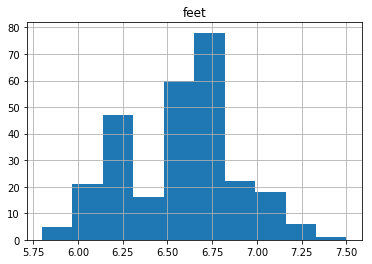

In [34]:
bbdfu.hist(column='feet')


In [35]:
#find the team with the most players in the population

from matplotlib import pyplot as plot
import numpy as np
pcounts = bbdf['TeamName'].value_counts()



print(pcounts)



Lakers          71
Spurs           61
Cavaliers       59
Heat            57
Rockets         56
Jazz            47
Suns            45
Magic           44
Bulls           44
Warriors        44
Celtics         43
Thunder         41
Nuggets         41
Sixers          37
Nets            36
Knicks          36
Blazers         33
Hawks           32
Raptors         31
Mavericks       30
Pistons         29
Hornets         27
Clippers        27
Timberwolves    26
Bucks           26
Wizards         23
Pacers          23
Kings           23
SuperSonics     20
Bobcats         11
Grizzlies        9
Bullets          8
Pelicans         5
Name: TeamName, dtype: int64


In [36]:
from matplotlib import pyplot as plot
import numpy as np
pcounts = bbdf['Last-Name'].value_counts()



print(pcounts[15:])

Pierce        18
Kidd          17
Westbrook     17
Nowitzki      16
Williams      14
Paul          13
Curry         12
McGrady       12
Olajuwon      12
Ewing         12
Wallace       11
Carter        11
Barkley       11
Drexler       11
DeRozan       10
Miller        10
Davis         10
Aldridge      10
Jefferson     10
Smith          9
Mutombo        9
Thomas         9
Wilkins        9
Bosh           9
Webber         9
Gasol          9
Stoudemire     8
Nash           8
Hardaway       8
Parker         8
              ..
Sikma          1
Hayward        1
Middleton      1
Teagle         1
Terry          1
Erving         1
Skiles         1
Young          1
Porzingis      1
Sullinger      1
Beal           1
Griffith       1
Green          1
Harrington     1
McMillen       1
Mills          1
Strickland     1
Jones          1
Mashburn       1
Petrovic       1
Vaught         1
Lin            1
Rondo          1
Bogut          1
Woolridge      1
Granger        1
Ruland         1
Barea         

In [37]:
bbdf.shape

(1145, 20)

In [38]:
bbdf.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Player                object
Position              object
Seasons in league      int64
Team                  object
Real_value           float64
Last-Name             object
First-Name            object
TeamName              object
City                  object
RSeason                int64
h                    float64
htype                 object
feet                 float64
inches                 int64
weight                 int64
wtype                 object
dtype: object

In [39]:


#ygroup = bbdf.groupby(['Season short', 'Position']).transform(np.mean)
pgroup = bbdf.groupby('Position',as_index=False)

print(pgroup)
list(pgroup)


[('C',
        Age Conference          Date  Draft Year               Player Position  \
  3      37       West  Mar 24, 1985        1969  Kareem Abdul-Jabbar        C   
  18     29       West   Dec 2, 1984        1977           Jack Sikma        C   
  20     29       East  Nov 18, 1984        1976         Moses Malone        C   
  24     28       East   Apr 6, 1986        1981        Herb Williams        C   
  40     27       East   Dec 8, 1985        1980          Jeff Ruland        C   
  43     23       East  Nov 17, 1985        1985        Patrick Ewing        C   
  54     31       East  Feb 22, 1987        1976         Moses Malone        C   
  61     24       East  Dec 28, 1986        1985        Patrick Ewing        C   
  67     33       East  Nov 16, 1986        1976        Robert Parish        C   
  100    26       East  Feb 26, 1989        1985        Patrick Ewing        C   
  101    26       West  Feb 19, 1989        1984      Hakeem Olajuwon        C   
  109    

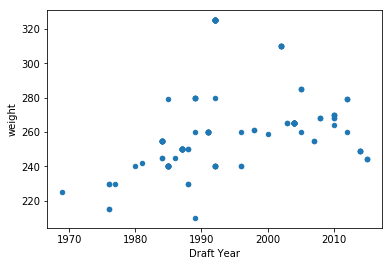

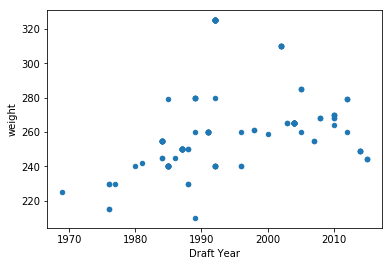

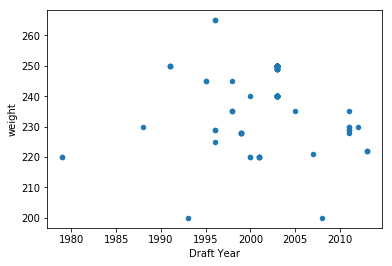

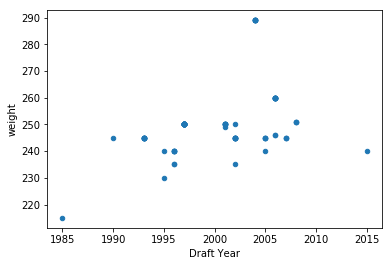

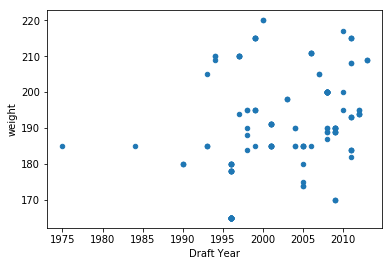

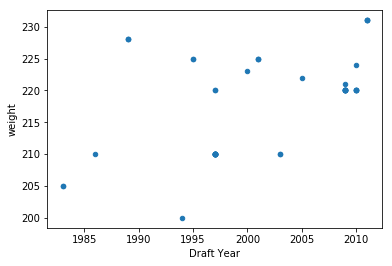

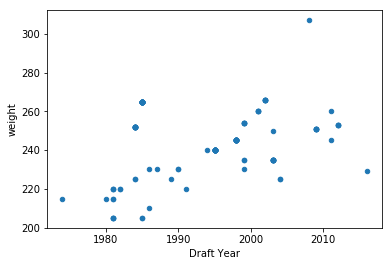

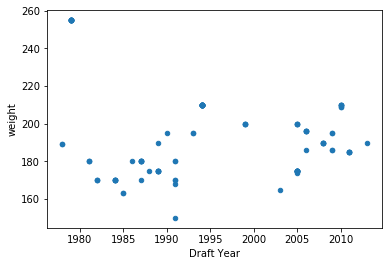

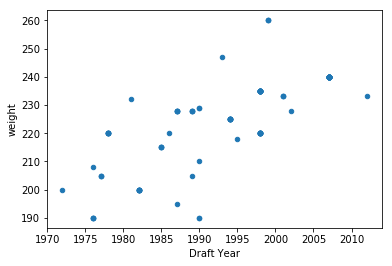

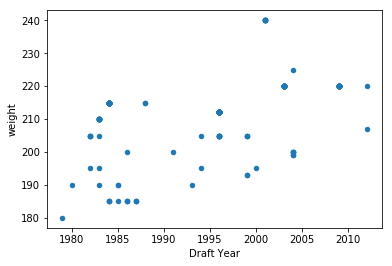

In [42]:
plot = pgroup.plot.scatter(x='Draft Year',y='weight')

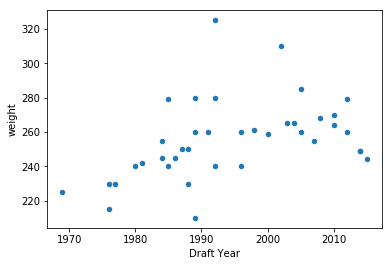

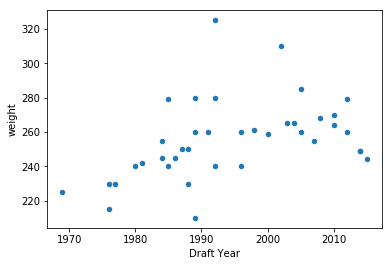

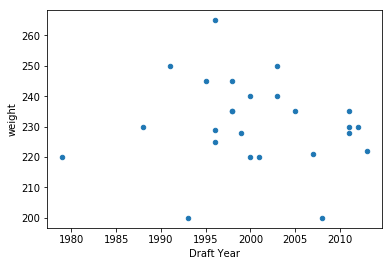

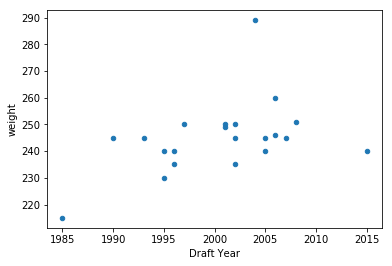

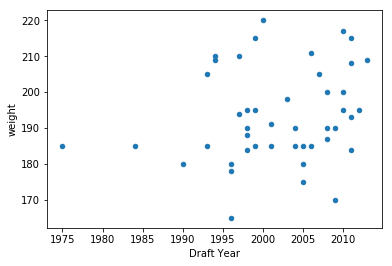

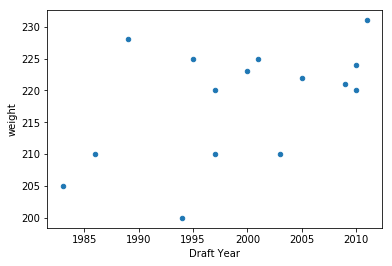

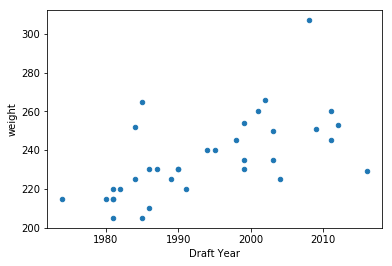

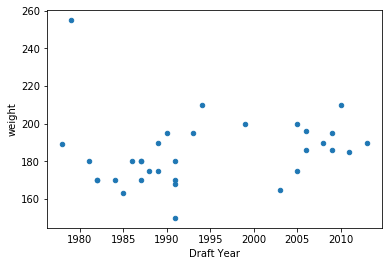

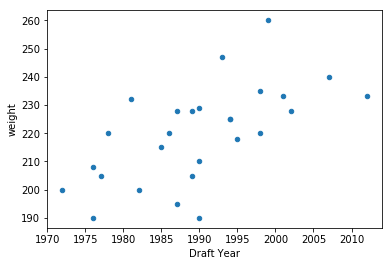

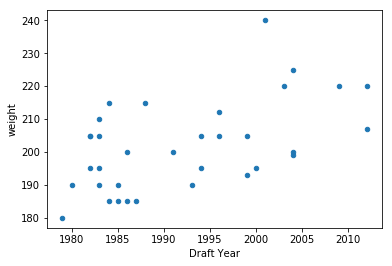

In [41]:
plot = bbdfug.plot.scatter(x='Draft Year',y='weight')